# Source Localisation Evaluation

In [1]:
EXPORT_LATEX = False

%matplotlib inline 
# %matplotlib notebook would provide interactive plots

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from mthesis.helpers import *  # all functions are in this package

PATH_LATEX_PLOTS = '/Users/jannismainczyk/latex/plots/boxplots/'

## All Data 

In [2]:
df = load_all_data()
dft = df

In [3]:
print("SUMMARY:")
dft = df
summary = dft.groupby('n-sources').agg({'x1':'count', 'err-mean':np.mean, 'percent-matched':np.mean}).rename(columns={'x1':'n'})
print(summary.transpose())

print_summary(dft, verbose=False)
print("OVERVIEW OF SAMPLE SIZES PER EVALUATION:")
dfp = df.pivot_table("x1", index=["n-sources"], columns=["reflect-order", "T60", "em", "md", "SNR","wd","var-val","var-fixed"], aggfunc='count').transpose()
print(dfp)

# if EXPORT_LATEX:
#     summary.transpose().to_latex("".join([PATH_LATEX_TABLES, 'summary-all.tex']), column_format="rrrrrrr", bold_rows=True)

SUMMARY:
n-sources           2     3     4    5    6    7
n               10070 10070 10070 9920 9670 9520
err-mean         0.15  0.26  0.35 0.41 0.46 0.44
percent-matched  0.78  0.71  0.65 0.60 0.55 0.52
DATA FROM:  {'min-distance', 'noise', 'em-iterations', 'var-fixed', 'reflect-order', 'worst-case', 'wd', 'T60', 'base'}
n-sources           2     3     4    5    6    7
n               10070 10070 10070 9920 9670 9520
em-iterations    6.57  6.57  6.57 6.60 6.64 6.66
T60              0.35  0.35  0.35 0.35 0.35 0.36
SNR              1.34  1.34  1.34 1.36 1.39 1.41
md               0.49  0.49  0.49 0.48 0.48 0.48
reflect-order    2.11  2.11  2.11 2.09 2.07 2.12
var-fixed        0.13  0.13  0.13 0.13 0.13 0.14
var-val          0.43  0.43  0.43 0.43 0.44 0.44
err-mean         0.15  0.26  0.35 0.41 0.46 0.44
percent-matched  0.78  0.71  0.65 0.60 0.55 0.52
NOTE: Data contains range of md (['0.1', '0.3', '0.5', '1.0'], n=[500, 300, 8520, 200])
NOTE: Data contains range of wd (['1.2', '1.3', 

# <font color='green'>--- PRINTING RESULTS TO TIKZ AND LATEX STARTS HERE ---</font>

## Fixed EM-Iterations

In [3]:
# Manipulate Data
var = "em"
dft = df
dft = dft[dft["description"]=="em-iterations"]
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
# dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)

DATA FROM:  {'em-iterations'}
n-sources          2    3    4    5    6    7
n               1200 1200 1200 1200 1200 1200
em-iterations   6.83 6.83 6.83 6.83 6.83 6.83
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.14 0.23 0.32 0.40 0.49 0.47
percent-matched 0.78 0.72 0.68 0.62 0.56 0.53
NOTE: Data contains range of em (['1.0', '2.0', '3.0', '5.0', '10.0', '20.0'], n=200)



In [4]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=var, aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)
# if EXPORT_LATEX:
#     dfp.to_latex("".join([PATH_LATEX_TABLES, 'results-{}.tex'.format(var)]), column_format="lcccccc", bold_rows=True)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
em                                     
1          200  200  200  200  200  200
2          200  200  200  200  200  200
3          200  200  200  200  200  200
5          200  200  200  200  200  200
10         200  200  200  200  200  200
20         200  200  200  200  200  200

MEAN ERROR:
n-sources    2    3    4    5    6    7
em                                     
1         0.19 0.37 0.48 0.50 0.65 0.60
2         0.17 0.23 0.39 0.47 0.52 0.50
3         0.14 0.22 0.29 0.43 0.46 0.44
5         0.12 0.20 0.25 0.36 0.46 0.44
10        0.13 0.20 0.25 0.30 0.39 0.43
20        0.08 0.18 0.28 0.31 0.45 0.41


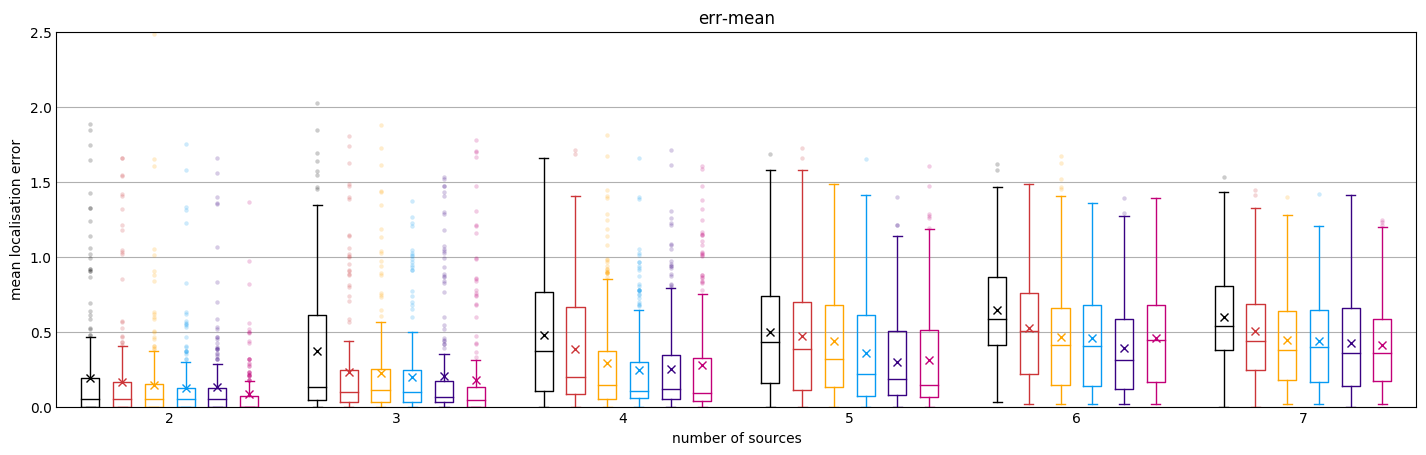

In [5]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)


ERR-MEAN:
n-sources    2    3    4    5    6    7
em                                     
1         0.19 0.37 0.48 0.50 0.65 0.60
2         0.17 0.23 0.39 0.47 0.52 0.50
3         0.14 0.22 0.29 0.43 0.46 0.44
5         0.12 0.20 0.25 0.36 0.46 0.44
10        0.13 0.20 0.25 0.30 0.39 0.43
20        0.08 0.18 0.28 0.31 0.45 0.41

PERCENT-MATCHED:
n-sources    2    3    4    5    6    7
em                                     
1         0.75 0.63 0.62 0.54 0.46 0.44
2         0.75 0.71 0.65 0.57 0.53 0.52
3         0.77 0.73 0.68 0.58 0.59 0.54
5         0.79 0.73 0.71 0.65 0.57 0.54
10        0.79 0.75 0.71 0.66 0.63 0.57
20        0.82 0.80 0.72 0.70 0.60 0.59


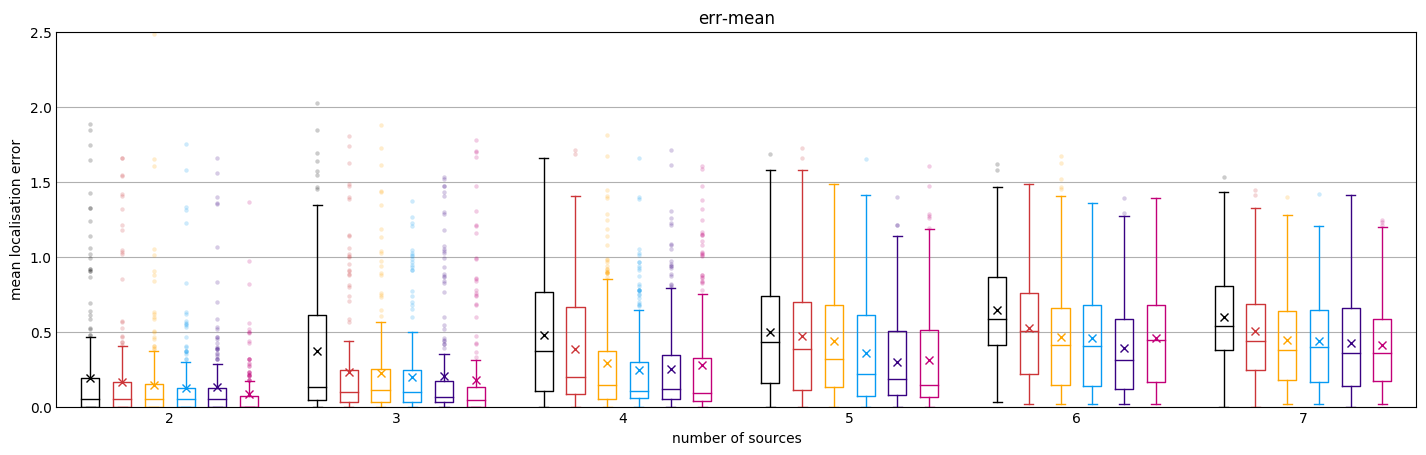

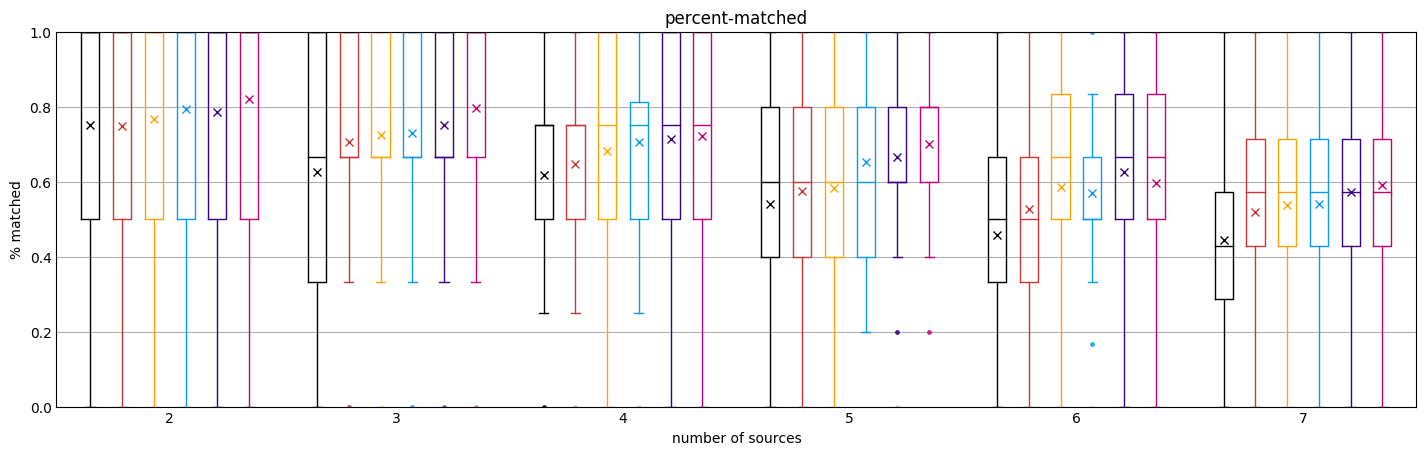

In [8]:
for measure in ['err-mean', 'percent-matched']:
    # Table
    print("\n{}:".format(measure.upper()))
    dfp = dft.pivot_table(measure, index=["n-sources"], columns=var, aggfunc='mean').transpose()
    print(dfp)

    # Boxplot
    fig = figure(figsize=(17,5)); ax  = fig.add_subplot(111)

    idx=0
    for val in dfp.index.values:
        dftt = dft[dft[var]==val]
        bp = dftt.boxplot(measure, by=["n-sources"], ax=ax, **boxplot_args)
        style_boxplot(bp, None, idx, len(dfp.index.values), measure)
        idx+=1

    if EXPORT_LATEX:
        tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}-{}.tex'.format(var, measure)]), strict=True, wrap=False)

## T60

In [4]:
# Manipulate Data
var = "T60"
dft = df
dft = dft[dft["reflect-order"]==-1]
# dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)

DATA FROM:  {'reflect-order', 'T60'}
n-sources          2    3    4    5    6    7
n               1000 1000 1000 1000 1000  850
em-iterations      5    5    5    5    5    5
T60             0.45 0.45 0.45 0.45 0.45 0.53
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order     -1   -1   -1   -1   -1   -1
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.24 0.38 0.49 0.55 0.56 0.56
percent-matched 0.72 0.64 0.59 0.53 0.49 0.41
NOTE: Data contains range of T60 (['0.0', '0.3', '0.6', '0.9'], n=[100, 250, 250, 250])
WARN: Unbalanced n_sources for 'T60'. There may be a trial running at the moment!
n-sources    2    3    4    5    6    7
T60                                    
0          250  250  250  250  250  100
0.30       250  250  250  250  250  250
0.60       250  250  250  250  250  250
0.90       250  250  250  250  250  250



In [5]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)
if EXPORT_LATEX:
    dfp.to_latex("".join([PATH_LATEX_TABLES, 'results-{}.tex'.format(var)]), column_format="lrrrrrr", bold_rows=True)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
T60                                    
0          250  250  250  250  250  100
0.30       250  250  250  250  250  250
0.60       250  250  250  250  250  250
0.90       250  250  250  250  250  250

MEAN ERROR:
n-sources    2    3    4    5    6    7
T60                                    
0         0.02 0.06 0.11 0.21 0.25 0.30
0.30      0.12 0.21 0.31 0.34 0.38 0.35
0.60      0.23 0.50 0.70 0.80 0.83 0.75
0.90      0.60 0.76 0.84 0.85 0.77 0.69


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


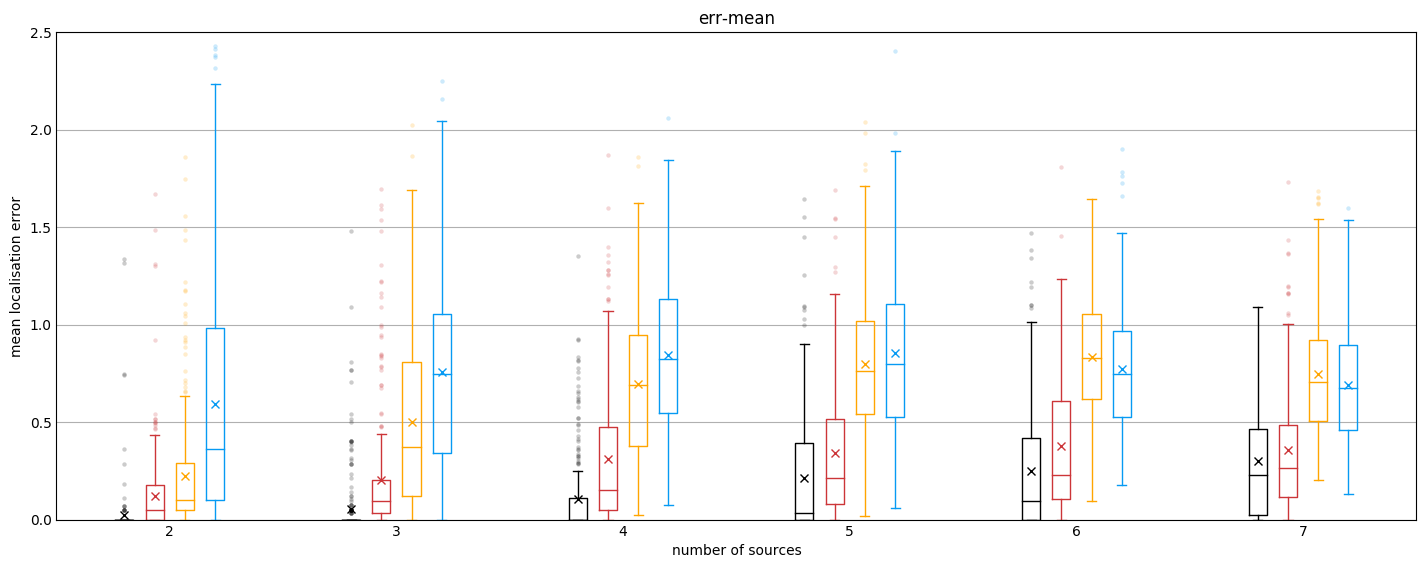

In [6]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Min-Distance 

In [20]:
var="md"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
# dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
dft = dft[dft["description"]!="T60"]
print_summary(dft)

DATA FROM:  {'min-distance', 'noise', 'em-iterations'}
n-sources          2    3    4    5    6    7
n               1200 1200 1200 1050  800  800
em-iterations      5    5    5    5    5    5
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.48 0.48 0.48 0.43 0.44 0.44
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.15 0.26 0.31 0.38 0.40 0.37
percent-matched 0.78 0.71 0.66 0.60 0.57 0.52
NOTE: Data contains range of md (['0.1', '0.3', '0.5', '1.0'], n=[200, 100, 400, 100])
WARN: Unbalanced n_sources for 'md'. There may be a trial running at the moment!
n-sources    2    3    4    5    6    7
md                                     
0.10       200  200  200  200  200  200
0.30       200  200  200  200  100  100
0.50       600  600  600  550  400  400
1          200  200  200  100  100  100



In [21]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["md"], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=["md"], aggfunc='mean').transpose()
print(dfp)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
md                                     
0.10       200  200  200  200  200  200
0.30       200  200  200  200  100  100
0.50       600  600  600  550  400  400
1          200  200  200  100  100  100

MEAN ERROR:
n-sources    2    3    4    5    6    7
md                                     
0.10      0.24 0.34 0.39 0.49 0.37 0.36
0.30      0.20 0.38 0.37 0.37 0.41 0.35
0.50      0.12 0.19 0.25 0.31 0.41 0.37
1         0.11 0.28 0.36 0.48 0.43 0.42


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


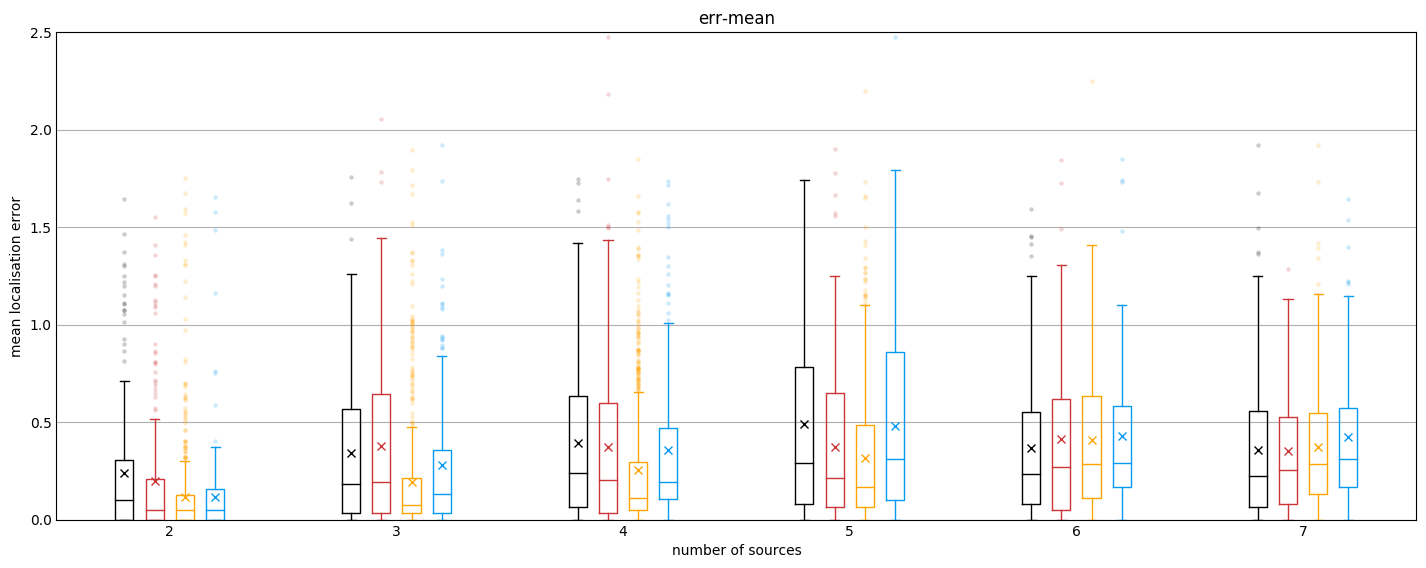

In [22]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Reflect Order

In [ ]:
# Manipulate Data
var = "reflect-order"
dft = df
# dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.6]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
# print_summary(dft)

In [ ]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["reflect-order"], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=["reflect-order"], aggfunc='mean').transpose()
print(dfp)

In [ ]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in [1,3,-1]:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

## SNR

In [ ]:
var = "SNR"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
# dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
dft = dft[dft["description"]=="noise"]
print_summary(dft)

In [ ]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

In [ ]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Wall distance

In [ ]:
var = "wd"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
# dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
# dfp = df.pivot_table("err-mean", index=["description", "wd"], columns="n-sources", aggfunc='mean').transpose()
# dfp.boxplot(column=("n-sources"))

In [ ]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

In [ ]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Best Case Scenario vs. Worst Case Scenario

In [ ]:
var = "wd"
dfts = []

print("BEST CASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==0]
dft = dft[dft["T60"]==0.0]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.5]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("BASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("WORST CASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==-1]
dft = dft[dft["T60"]==0.9]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==5]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("GUESSING:")
dft = matlab2pandas(dirname='_guessing', save_to=path.join(PATH_ROOT, '_guessing'), summary=True)
dfts.append(dft)

In [ ]:
# Joint Boxplot, grouped
fig = figure( figsize=(17,6.5) ); ax  = fig.add_subplot(111)
idx=0
for dft in dfts:
    dftt = dft
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, 4)
    idx+=1
# adjust axis to larger values of guessing and worst case scenario
ax.set_ylim([0,3.51])
ax.set_yticks(np.arange(0,3.51,0.25))

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-best-case.tex'.format(var)]), strict=True, wrap=False)

# Variance Analysis

In [ ]:
# Manipulate Data
dft = df.copy()
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==10]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
print_summary(dft)

In [ ]:
# Sample Sizes
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["var-val","var-fixed"], aggfunc='count').transpose()
print(dfp)
init_vars = set([x[0] for x in dfp.index.values])
var_fixed = set([x[1] for x in dfp.index.values])

In [ ]:
var = 'var-val'
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
fig = figure( figsize=(17,6.5) ); ax  = fig.add_subplot(111)

idx=0
for val in sorted(init_vars):
    dftt = dft[dft[var]==val]
    dftt = dftt[dftt['var-fixed']==1]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(init_vars))
    idx+=1
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
ax, i = init_grid((2,2),(17,17))
cols = ['err-mean', 'percent-matched']
axis_param = [[0.1, 0, 0, 1.01],[0.1, 0, 0,1.01],[0.1, 0, 0, 1.01],[0.1, 0, 0,1.01]]
for vf in [1, 0]:
    dftt = dft[dft["var-fixed"]==vf]
    for col in cols:
        a = dftt.pivot_table(col, index=['n-sources'], columns=['var-val', 'var-fixed'], aggfunc='mean').plot(**DEFAULT_LINE_PLOT_ARGS, grid=True, ax=ax[i])
        ax[i].legend_.remove()
        a.set_ylim([0,1])
        style_line_plot("", "", grid='x', ax=ax[i])
        adjust_y_axis(*axis_param[i], a)
        i+=1
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'plot-variance-fixed.tex']),
    figureheight = '\\figureheight',
    figurewidth = '\\figurewidth'
    )

# Analyse DataFrame

### Examine Outliers

In [ ]:
# print(pd.concat([df[df["err-mean"]>=1.5].loc[:, "err1":"err7"], df[df["err-mean"]>=1.5].loc[:, "x1":"x7"]], axis=1))
print("ERRORS:\n{}\n".format(dft[dft["err-mean"]>=1.5].loc[:, "err1":"err7"]))
print("X-COORDINATES:\n{}\n".format(dft[dft["err-mean"]>=1.5].loc[:, "x1":"x7est"]))
print("Y-COORDINATES:\n{}\n".format(dft[dft["err-mean"]>=1.5].loc[:, "y1":"y7est"]))

In [ ]:
# Box Plot
bp = df.boxplot('err-mean', by=["n-sources", "refl-ord"], return_type='both',figsize=(17,  12), showmeans=True, meanline=True)
style_boxplot(bp,None,0,1)

# if EXPORT_LATEX:
#     tikz_save(PATH_BOX_PLOT, show_info=False)

# Perfect Match Analysis

In [ ]:
dfcp = df.pivot_table("percent-matched", columns="refl-ord", aggfunc='mean').transpose()
dfcp.plot(**DEFAULT_LINE_PLOT_ARGS)
# Style plot
style_line_plot(xlabel="number of sources", ylabel="perfect matches", grid="y")